In [1]:
import os
import zipfile
import shutil
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from shutil import copyfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras 
import pathlib
from shutil import copyfile
import matplotlib.pyplot as plt

In [2]:
with zipfile.ZipFile('Chicken-Copy1.zip.zip', 'r') as zip_ref:
  zip_ref.extractall('./Dataset_refurbish')
  print('Zip is done extracting!')

Zip is done extracting!


In [3]:
labels = pd.read_csv('./Dataset_refurbish/train_data.csv')
labels = labels.sort_values('label')

class_names = list(labels.label.unique())

print(class_names)

train_images = './Dataset_refurbish/Train'
train_cat = './Data_train/train'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(train_cat):
  shutil.rmtree(train_cat)

def create_data_category(root_path):
  for i in class_names:
    os.makedirs(os.path.join(root_path, i))

try:
  create_data_category(root_path=train_cat)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

['Coccidiosis', 'Healthy', 'New Castle Disease', 'Salmonella']


In [4]:
cocci = "./Data_train/train/Coccidiosis/"
healthy = "./Data_train/train/Healthy/"
ncd = "./Data_train/train/New Castle Disease/"
salmon = "./Data_train/train/Salmonella/"


In [5]:
# Empty directories in case you run this cell multiple times
if len(os.listdir(cocci)) > 0:
  for file in os.scandir(cocci):
    os.remove(file.path)
if len(os.listdir(healthy)) > 0:
  for file in os.scandir(healthy):
    os.remove(file.path)
if len(os.listdir(ncd)) > 0:
  for file in os.scandir(ncd):
    os.remove(file.path)
if len(os.listdir(salmon)) > 0:
  for file in os.scandir(salmon):
    os.remove(file.path)

# moving the image files to their respective categories
for c in class_names: # Category Name
    for i in list(labels[labels['label']==c]['images']): # Image Id
        get_image = os.path.join('./Dataset_refurbish/Train/', i) # Path to Images 
        if len(os.listdir('./Data_train/train/'+c)) < 550:
          move_image_to_cat = shutil.move(get_image, './Data_train/train/'+c)


print(len(os.listdir(cocci)))
print(len(os.listdir(healthy)))
print(len(os.listdir(ncd)))
print(len(os.listdir(salmon)))

550
550
550
550


In [6]:
# Define root directory
root_dir = './Data_refurbish'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
  os.makedirs(os.path.join(root_path,'testing/Coccidiosis'))
  os.makedirs(os.path.join(root_path,'testing/Healthy'))
  os.makedirs(os.path.join(root_path,'testing/New Castle Disease'))
  os.makedirs(os.path.join(root_path,'testing/Salmonella'))
  os.makedirs(os.path.join(root_path,'training/Coccidiosis'))
  os.makedirs(os.path.join(root_path,'training/Healthy'))
  os.makedirs(os.path.join(root_path,'training/New Castle Disease'))
  os.makedirs(os.path.join(root_path,'training/Salmonella'))
  os.makedirs(os.path.join(root_path,'validation/Coccidiosis'))
  os.makedirs(os.path.join(root_path,'validation/Healthy'))
  os.makedirs(os.path.join(root_path,'validation/New Castle Disease'))
  os.makedirs(os.path.join(root_path,'validation/Salmonella'))

try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [7]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  dir = []
  for name in os.listdir(SOURCE):
    file = SOURCE + name
    if os.path.getsize(file) > 0:
      dir.append(name)
    else:
      print(name + " is zero length, so ignoring.")
    train_length = int(len(dir) * SPLIT_SIZE)
    test_length = int(len(dir) - train_length)
    shuffeld = random.sample(dir, len(dir))
    train_set = shuffeld[0:train_length]
    test_set = shuffeld[-test_length:]
  
  for name in train_set:
    source = SOURCE + name
    destination = TRAINING + name
    copyfile(source, destination)

  for name in test_set:
    source = SOURCE + name
    destination = TESTING + name
    copyfile(source, destination)

In [8]:
import random
from shutil import copyfile
TRAINING_DIR = "./Data_refurbish/training/"
TESTING_DIR = "./Data_refurbish/testing/"
VALIDATION_DIR = "./Data_refurbish/validation/"

TRAINING_COCCI_DIR = os.path.join(TRAINING_DIR, "Coccidiosis/")
TESTING_COCCI_DIR = os.path.join(TESTING_DIR, "Coccidiosis/")
VALIDATION_COCCI_DIR = os.path.join(VALIDATION_DIR, "Coccidiosis/")

TRAINING_HEALTHY_DIR = os.path.join(TRAINING_DIR, "Healthy/")
TESTING_HEALTHY_DIR = os.path.join(TESTING_DIR, "Healthy/")
VALIDATION_HEALTHY_DIR = os.path.join(VALIDATION_DIR, "Healthy/")

TRAINING_NCD_DIR = os.path.join(TRAINING_DIR, "New Castle Disease/")
TESTING_NCD_DIR = os.path.join(TESTING_DIR, "New Castle Disease/")
VALIDATION_NCD_DIR = os.path.join(VALIDATION_DIR, "New Castle Disease/")

TRAINING_SALMON_DIR = os.path.join(TRAINING_DIR, "Salmonella/")
TESTING_SALMON_DIR = os.path.join(TESTING_DIR, "Salmonella/")
VALIDATION_SALMON_DIR = os.path.join(VALIDATION_DIR, "Salmonella/")

if len(os.listdir(TRAINING_COCCI_DIR)) > 0:
  for file in os.scandir(TRAINING_COCCI_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_HEALTHY_DIR)) > 0:
  for file in os.scandir(TRAINING_HEALTHY_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_NCD_DIR)) > 0:
  for file in os.scandir(TRAINING_NCD_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_SALMON_DIR)) > 0:
  for file in os.scandir(TRAINING_SALMON_DIR):
    os.remove(file.path)

if len(os.listdir(TESTING_COCCI_DIR)) > 0:
  for file in os.scandir(TESTING_COCCI_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_HEALTHY_DIR)) > 0:
  for file in os.scandir(TESTING_HEALTHY_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_NCD_DIR)) > 0:
  for file in os.scandir(TESTING_NCD_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_SALMON_DIR)) > 0:
  for file in os.scandir(TESTING_SALMON_DIR):
    os.remove(file.path)



    
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(cocci, TRAINING_COCCI_DIR , TESTING_COCCI_DIR, split_size)
split_data(healthy, TRAINING_HEALTHY_DIR, TESTING_HEALTHY_DIR, split_size)
split_data(ncd, TRAINING_NCD_DIR, TESTING_NCD_DIR, split_size)
split_data(salmon, TRAINING_SALMON_DIR, TESTING_SALMON_DIR, split_size)


# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_COCCI_DIR))} images of cocci for training")
print(f"There are {len(os.listdir(TRAINING_HEALTHY_DIR))} images of healthy for training")
print(f"There are {len(os.listdir(TRAINING_NCD_DIR))} images of ncd for training")
print(f"There are {len(os.listdir(TRAINING_SALMON_DIR))} images of salmon for training")

print(f"There are {len(os.listdir(TESTING_COCCI_DIR))} images of cocci for testing")
print(f"There are {len(os.listdir(TESTING_HEALTHY_DIR))} images of healthy for testing")
print(f"There are {len(os.listdir(TESTING_NCD_DIR))} images of ncd for testing")
print(f"There are {len(os.listdir(TESTING_SALMON_DIR))} images of salmon for testing")



There are 440 images of cocci for training
There are 440 images of healthy for training
There are 440 images of ncd for training
There are 440 images of salmon for training
There are 110 images of cocci for testing
There are 110 images of healthy for testing
There are 110 images of ncd for testing
There are 110 images of salmon for testing


In [9]:
def train_val_generators(TRAINING_DIR,VALIDATION_DIR):
  train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                    rotation_range = 40,
                                    width_shift_range = 0.2,
                                    height_shift_range = 0.2,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    fill_mode = 'nearest')
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size =100,
                                                      class_mode="sparse",
                                                      target_size=(224,224))
  
  validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                               batch_size=100,
                                                               class_mode = "sparse",
                                                               target_size=(224,224))
  
  return train_generator,validation_generator



In [10]:
train_generator,validation_generator = train_val_generators(TRAINING_DIR,TESTING_DIR)

Found 1760 images belonging to 4 classes.
Found 440 images belonging to 4 classes.


In [11]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss') <= 0.12 and logs.get('val_loss') <=0.12):
        print()
        print("/n stop the training because the loss is already on target")
        self.model.stop_training=True

In [12]:
def create_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),  
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(4, activation='softmax')  
  ])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  return model

In [13]:
model = create_model()
callbacks = Callback()
history = model.fit(train_generator,
                    epochs=100,
                    verbose=1,
                    callbacks=[callbacks],
                    validation_data=validation_generator)

Epoch 1/100
18/18 [==============================] - 82s 4s/step - loss: 1.4683 - accuracy: 0.3034 - val_loss: 1.6133 - val_accuracy: 0.3909
Epoch 2/100
18/18 [==============================] - 76s 4s/step - loss: 1.2445 - accuracy: 0.3847 - val_loss: 1.1183 - val_accuracy: 0.4227
Epoch 3/100
18/18 [==============================] - 74s 4s/step - loss: 1.0224 - accuracy: 0.5534 - val_loss: 0.9929 - val_accuracy: 0.6455
Epoch 4/100
18/18 [==============================] - 75s 4s/step - loss: 0.9199 - accuracy: 0.6267 - val_loss: 0.8748 - val_accuracy: 0.6477
Epoch 5/100
18/18 [==============================] - 72s 4s/step - loss: 0.8724 - accuracy: 0.6568 - val_loss: 0.8551 - val_accuracy: 0.6659
Epoch 6/100
18/18 [==============================] - 72s 4s/step - loss: 0.7874 - accuracy: 0.6852 - val_loss: 0.7773 - val_accuracy: 0.7136
Epoch 7/100
18/18 [==============================] - 73s 4s/step - loss: 0.7432 - accuracy: 0.6977 - val_loss: 0.6642 - val_accuracy: 0.7591
Epoch 8/100
1

Epoch 59/100
18/18 [==============================] - 87s 5s/step - loss: 0.2270 - accuracy: 0.9244 - val_loss: 0.2352 - val_accuracy: 0.9295
Epoch 60/100
18/18 [==============================] - 90s 5s/step - loss: 0.2167 - accuracy: 0.9165 - val_loss: 0.2677 - val_accuracy: 0.9250
Epoch 61/100
18/18 [==============================] - 88s 5s/step - loss: 0.2317 - accuracy: 0.9142 - val_loss: 0.2038 - val_accuracy: 0.9432
Epoch 62/100
18/18 [==============================] - 90s 5s/step - loss: 0.1952 - accuracy: 0.9295 - val_loss: 0.2760 - val_accuracy: 0.9159
Epoch 63/100
18/18 [==============================] - 87s 5s/step - loss: 0.2498 - accuracy: 0.9085 - val_loss: 0.3051 - val_accuracy: 0.9136
Epoch 64/100
18/18 [==============================] - 88s 5s/step - loss: 0.1943 - accuracy: 0.9312 - val_loss: 0.2269 - val_accuracy: 0.9409
Epoch 65/100
18/18 [==============================] - 88s 5s/step - loss: 0.1755 - accuracy: 0.9381 - val_loss: 0.2081 - val_accuracy: 0.9432
Epoch 

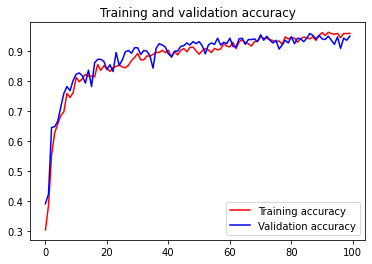

<Figure size 432x288 with 0 Axes>

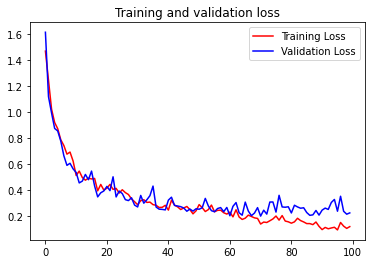

<Figure size 432x288 with 0 Axes>

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [38]:
import os
import numpy as np
from keras.preprocessing import image

images = os.listdir("./TFLite_Pred")

print(images)

for i in images:
    print()
#     # predicting images
    path = './TFLite_Pred/' + i
    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(path)
    if classes[0][0] > classes[0][1] and classes[0][0] > classes[0][2] and classes[0][0] > classes[0][3]   :
        print("Your chicken got Coccidiosis")
    elif classes[0][1] > classes[0][0] and classes[0][1] > classes[0][2] and classes[0][1] > classes[0][3] :
        print("Your chicken is Healthy")
    elif classes[0][2] > classes [0][0] and classes[0][2] > classes [0][1] and classes[0][2] > classes [0][3] :
        print("Your chicken got New Castle Disease")
    elif classes[0][3] > classes [0][0] and classes[0][3] > classes [0][1] and classes[0][3] > classes [0][2] :
        print("Your chicken got Salmonella")

['11-8-12-21.jpg', 'blood-in-chicken-dropping.jpg', 'coccio-testing3.webp', 'Fåsse_pesse_des_poyes_vete_schite.jpg', 'health-testing5.jpg', 'healthy.683.jpg', 'ncd-testing1.webp', 'Newcastle-disease-symptom-green-color-feces.webp', 'salmo.2127.jpg']

./TFLite_Pred/11-8-12-21.jpg
Your chicken got Coccidiosis

./TFLite_Pred/blood-in-chicken-dropping.jpg
Your chicken got Salmonella

./TFLite_Pred/coccio-testing3.webp
Your chicken got Coccidiosis

./TFLite_Pred/Fåsse_pesse_des_poyes_vete_schite.jpg
Your chicken got New Castle Disease

./TFLite_Pred/health-testing5.jpg
Your chicken got Coccidiosis

./TFLite_Pred/healthy.683.jpg
Your chicken got Coccidiosis

./TFLite_Pred/ncd-testing1.webp
Your chicken got New Castle Disease

./TFLite_Pred/Newcastle-disease-symptom-green-color-feces.webp
Your chicken got New Castle Disease

./TFLite_Pred/salmo.2127.jpg
Your chicken got Salmonella


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

## EXPORTING to TFLite

In [40]:

export_dir = 'final_model/1'

tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: final_model/1\assets


INFO:tensorflow:Assets written to: final_model/1\assets


In [41]:
# Select mode of optimization
mode = "Speed" 

if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
elif mode == 'Speed':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY
else:
    optimization = tf.lite.Optimize.DEFAULT

In [46]:


converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimzations
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

# Invoke the converter to finally generate the TFLite model
tflite_model = converter.convert()

In [47]:
tflite_model_file = pathlib.Path('./chicky_final_model.tflite')
tflite_model_file.write_bytes(tflite_model)

19284576

## Test the MODEL with TFLite Interpreter

In [48]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [49]:
# Gather results for the randomly sampled test images
from PIL import Image
result= []
images = os.listdir("./TFLite_Pred")
classes = ["Cocciodiosis", "Healthy", "New Castle Disease", "Salmonella"]
for img in images :
    print("filename : " + img)
    image = Image.open(os.path.join("./TFLite_Pred", img)).resize((224,224))
    image = np.expand_dims(image, axis=0)
    input_data = np.array(np.asarray(image), dtype = np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print("Your chicken identified " + classes[np.argmax(output_data)])

filename : 11-8-12-21.jpg
Your chicken identified Cocciodiosis
filename : blood-in-chicken-dropping.jpg
Your chicken identified Salmonella
filename : coccio-testing3.webp
Your chicken identified Cocciodiosis
filename : Fåsse_pesse_des_poyes_vete_schite.jpg
Your chicken identified New Castle Disease
filename : health-testing5.jpg
Your chicken identified Cocciodiosis
filename : healthy.683.jpg
Your chicken identified Cocciodiosis
filename : healthy.76.jpg
Your chicken identified Cocciodiosis
filename : ncd-testing1.webp
Your chicken identified Salmonella
filename : Newcastle-disease-symptom-green-color-feces.webp
Your chicken identified New Castle Disease
filename : salmo.2127.jpg
Your chicken identified Salmonella
